# Karpathy micrograd Tutorial

An implementation of [micrograd library](https://github.com/karpathy/micrograd) by Karpathy as taught in his [video](https://youtu.be/VMj-3S1tku0). Micrograd is an autograd engine (automatic gradient), a library that implements the backpropagation algorithm. It is scalar-valued autograd engine, meaning that it works on the level of individual scalars. This is excessive in practice because it makes neural networks atomistic. In real life we use tensors for efficency (arrays of these scalars that take advantage of the parallelism of the computer (efficient matrix multiplication > many dot products to reduce number of multiplication operations)).

Backpropagation: algorithm that efficiently evalutates the gradient of a loss function with respect to the weights of a neural network.

Iteratively tune the weights of a neural network to decrease loss.

In [117]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
## 1) Working with derivatives

---


In [118]:
def f(x):
    return 3*x**2 - 4*x + 5

In [119]:
f(3.0)

20.0

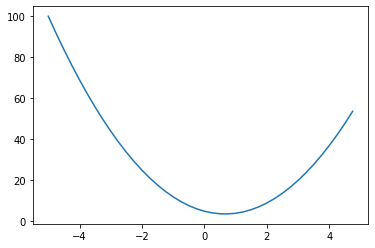

In [120]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

A function of a real variable $f(x)$ is differentiable at a point $a$ of its domain, if its domain contains
an open interval $I$ containing a, and the limit

\begin{equation*}
L = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}.
\end{equation*}

We can think of this as a derivative in the sense that if we slightly increase the function at a point $a$ by a small 
amount $h$, the slope will respond with a particular sensitivity. Does the function go up or down, and by how much?

We can evaluate a derivative numerically by taking a small $h$:

In [121]:
# take a small h
h = 0.001
x = 3.0

# we know that f(x) = f(3.0) = 20.0
# looking at the graph above, we expect that the function should increase if move to the right of 3.0
# if we move positively, the function should respond positively
print(f'f(x+h): {f(x+h)}')

# we can see how much the function responded in a positive direction
print(f'f(x+h) - f(x): {f(x+h) - f(x)}')

# and now we normalize the value by the run to get slope: slope = rise / run
print(f'(f(x+h) - f(x))/f(h): {(f(x+h) - f(x))/f(h)}')

# if we look at x = 2/3, if we nudge in a positive direction, the function doesn't respond -- so slope = 0

f(x+h): 20.014003000000002
f(x+h) - f(x): 0.01400300000000243
(f(x+h) - f(x))/f(h): 0.0028028405907687464


#### Now let's look at a more complex input that is a combination of scalars:

Consider the function 

$ \hspace{3em} f(a,b,c) = a * b + c $

with 

$\hspace{3em} a = 2, \enspace b = -3, \text{ and} \enspace c = 10$.


If we bump the input in $a$ up by a tiny amount $h > 0$, the function should slightly decrease in value becuase $b < 0$.

\begin{equation*}
 f(a+h,b,c) = (a+h) * b + c <  a * b + c = f(a,b,c)
\end{equation*}

so 
\begin{equation*}
 f(a+h,b,c) - f(a,b,c) < 0.
\end{equation*}

We can find out how much the function responds to this change by taking the partial derivative of $f$ with respect to $a$.

\begin{equation*}
\frac{\partial f}{\partial a} = \frac{\partial}{\partial a} (a \cdot b + c) = 
    \frac{\partial}{\partial a}(a \cdot b) + \frac{\partial}{\partial a}(c) = b + 0 = b = -3
\end{equation*}





In [122]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# bump the input by a tiny amount in a
d1 = a*b + c   # d1 == 4
a += h
d2 = a*b + c   # d2 == number slightly less than 4 when we increase a because b is negative 

# normalize by h to get slope
slope = (d2-d1)/h

# slope should be negative because smaller - larger
# the slope should be around -3 because we are differentiating with respect 
# to a, which would give d/da(a*b+c) = b = -3
print("d1", d1)
print("d2", d2)
print("slope", slope)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


Similarly, if we bump up $b$ by a small $h>0$, we will see that the function increases because $b<0$ with $b+h$ being slighly less negative. 

\begin{equation*}
 f(a,b+h,c) - f(a,b,c) > 0.
\end{equation*}

We find that the slope corresponding to this perturbation in b is

\begin{equation*}
\frac{\partial f}{\partial b} = a = 2
\end{equation*}


In [123]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# bump the input by a tiny amount in b
d1 = a*b + c   # d1 == 4
b += h
d2 = a*b + c   # d2 == number slightly larger than 4 becuase b is slightly less negative

# normalize by h to get slope
slope = (d2-d1)/h

# slope should be positive because larger - smaller
# the slope should be around 2 because we are differentiating with respect 
# to b, which would give d/db(a*b+c) = a = 2
print("d1", d1)
print("d2", d2)
print("slope", slope)


d1 4.0
d2 4.0002
slope 2.0000000000042206


If we bump up $c$ by a small $h>0$, we will see that the function increases. 

\begin{equation*}
 f(a,b,c+h) - f(a,b,c) > 0.
\end{equation*}

Because $c$ is a variable with a coefficient of $1$, the function will increase by the same amount $h$ that we added to $c$. We find that the slope corresponding to this perturbation in $c$ is

\begin{equation*}
\frac{\partial f}{\partial c} = 1
\end{equation*}


In [124]:
h = 0.0001  # we actually find that the function will increase by exactly this amount because c is a constant

# inputs
a = 2.0
b = -3.0
c = 10.0

# bump the input by a tiny amount in c
d1 = a*b + c   # d1 == 4
c += h
d2 = a*b + c   # d2 == d1 + h

# normalize by h to get slope
slope = (d2-d1)/h

# slope should be positive because larger - smaller
# the slope should be around 1 because we are differentiating with respect 
# to c, which would give d/dc(a*b+c) = 1
print("d1", d1)
print("d2", d2)
print("slope", slope)


d1 4.0
d2 4.0001
slope 0.9999999999976694


---
## 2) Creating a Container Part 1

We want to create a container that acts as a wrapper and creates a directed graph of scalar values

---


In [125]:
class Value:
    
    # children initialization: convert tuple to set for efficiency... set = unordered, unchangeable, unique values
    def __init__(self, data, _children=(), _op='', label=''):
            self.data = data              # wrapped python value
            self.grad = 0.0               # derivative of root node wrt self.data (initially 0 bc assuming no effect on output -- changing this variable doesn't change loss function)
            self._prev = set(_children)   # pointers to Values used to create self (empty tuple by default)
            self._op = _op                # operation used to create self (empty string by default)
            self.label = label            # name of node
            
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') 
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1) / (math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')
        return out
        
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c') 
e = a*b; e.label ='e'     # semicolon allows for multiple statements in a single line
d = e + c; d.label ='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

# (a.__mul(b)).__add__(c)
#d = a*b + c; d.label = 'd'

d


Value(data=4.0)

In [126]:
# d points to the values that created it+
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [127]:
# operation used to create d
d._op

'+'

Here we import some code to help visualize the data structure we created above

In [128]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data: %.4f | grad: %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

Visualize a forward pass

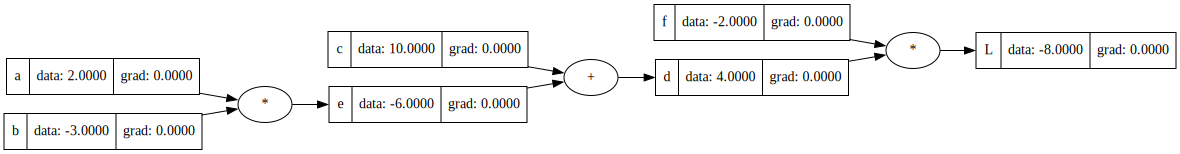

In [129]:
draw_dot(L)

---

## 3) Intro to Backpropagation

---


Let's think about the backpropagation algorithm. We must take the derivative of the root node, $R$, with respect to all nodes below it. Then for a node with label $n$, we have that 

\begin{equation*}
n.grad = \frac{\partial R}{\partial n} \enspace or \enspace node.grad = \frac{\partial root}{\partial node}.
\end{equation*}


Consider the example above. Here, the root node is $L$ where

\begin{align*}
e = a \cdot b \\
d = c + e \\
L = d \cdot f \\
\end{align*}

with

\begin{align*}
a = 2, \enspace
b = -3, \enspace
c = 10, \enspace
f = -2.
\end{align*}

Then by the definition of a derivative,

\begin{equation*}
L.grad = \frac{\partial L}{\partial L} = \lim_{h \to 0} \frac{(L(d, f) + h) - L(d, f)}{h} = \lim_{h \to 0} 
\frac{d \cdot f + h - d \cdot f}{h} = \frac{h}{h} = 1
\end{equation*}

and

\begin{equation*}
d.grad = \frac{\partial L}{\partial d} = \lim_{h \to 0} \frac{L(d + h, f) - L(d, f)}{h} = \lim_{h \to 0} 
\frac{(d + h) \cdot f - d \cdot f}{h} = \lim_{h \to 0} \frac{d \cdot f + h \cdot f - d \cdot f}{h} = \frac{h \cdot f}{h} = f = -2.
\end{equation*}

Similarly, 

\begin{equation*}
f.grad = \frac{\partial L}{\partial f} = \frac{\partial}{\partial f}(d \cdot f) = d = c + e = c + a \cdot b = 10 + 2 \cdot (-3) = 4.
\end{equation*}

Now let's figure out how $L$ is affected by small changes in nodes $a, b, c$. $L$ is affected by its children, which are affected by their children, and so on.

Let's first consider the values $\frac{\partial d}{\partial c}$ and $\frac{\partial d}{\partial e}$:


\begin{equation*}
\frac{\partial d}{\partial c} = \lim_{h \to 0} \frac{d(c+h, e) - d(c, e)}{h} = \lim_{h \to 0} 
\frac{((c+h) + e)  - (c + e)}{h} = \frac{h}{h} = 1.
\end{equation*}

Similarly,

\begin{equation*}
\frac{\partial d}{\partial e} = \frac{\partial}{\partial e}(c + e) = 1.
\end{equation*}

We can now use the chain rule to determine how changes in $d$ affect $L$. According to [Wikipedia](https://en.wikipedia.org/wiki/Chain_rule), "if a variable $z$ depends on the variable $y$, which itself depends on the variable $x$ (that is, $y$ and $z$ are dependent variables), then $z$ depends on $x$ as well, via the intermediate variable $y$. In this case, the chain rule is expressed as"

\begin{equation*}
\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx} \enspace for \enspace z(y), y(x).
\end{equation*}

"Intuitively, the chain rule states that knowing the instantaneous rate of change of $z$ relative to $y$ and that of $y$ relative to $x$ allows one to calculate the instantaneous rate of change of $z$ relative to $x$ as the product of the two rates of change. If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."

So we know $\frac{\partial L}{\partial d}$ and $\frac{\partial d}{\partial c}$ and we want to find $\frac{\partial L}{\partial c}$. This is given by

\begin{equation*}
\frac{\partial L}{\partial c} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c} = (-2) \cdot 1 = -2.
\end{equation*}

From this we can extract an interesting insight: because the local derivative $\frac{\partial d}{\partial c}$ = 1, we basically just copy over the value of $\frac{\partial L}{\partial d}$ to $\frac{\partial L}{\partial c}$.

So we can say that a '$+$' node routes the gradient because the gradients of '$+$' nodes' local derivatives 
(local derivative means $\frac{\partial parent}{\partial child} = \frac{\partial parent_{of \hspace{0.1em} node \hspace{0.1em} i}}{\partial node_i}$ as opposed to a global derivative $\frac{\partial root}{\partial node_i}$) are just $1$. So by the chain rule, $1 \cdot \frac{\partial L}{\partial d} = \frac{\partial L}{\partial d}$.  


And we now know that 

\begin{equation*}
c.grad = \frac{\partial L}{\partial c} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c} = (-2) \cdot 1 =(-2) \cdot 1 = -2.
\end{equation*}

Similarly,


\begin{equation*}
e.grad = \frac{\partial L}{\partial e} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial e} = (-2) \cdot 1 = -2.
\end{equation*}

The backpropagating signal, which carries the information about the derivative of the root, $L$, with respect to all the intermediate nodes, flows backwards through the graph. A '$+$' node will simply distribute the derivative to all the children nodes below it.

Now let's look at how the chain rule is applied when there is a '$*$' node.


\begin{equation*}
a.grad = \frac{\partial L}{\partial a} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a} =
\frac{\partial L}{\partial e} \cdot \frac{\partial}{\partial a}(a \cdot b) = \frac{\partial L}{\partial e} \cdot b = 
grad.e \cdot b = (-2) \cdot (-3) = 6
\end{equation*}


\begin{equation*}
b.grad = \frac{\partial L}{\partial b} =  \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial b} =
\frac{\partial L}{\partial e} \cdot \frac{\partial}{\partial b}(a \cdot b) = \frac{\partial L}{\partial e} \cdot a = 
grad.e \cdot b = (-2) \cdot 2 = -4
\end{equation*}

We see that '$*$' nodes require us to take the partial derivative of the parent node with respect to the child node.

In summary, backpropagation is just the recursive application of the chain rule backwards through the computational graph. It iterates over the nodes, starting at the root, and locally applies the chain rule at node $i$ by

\begin{equation*}
\frac{\partial root}{\partial node_i} = \frac{\partial root}{\partial parent_{of \hspace{0.1em} node \hspace{0.1em} i}} \cdot \frac{\partial parent_{of \hspace{0.1em} node \hspace{0.1em} i}}{\partial node_i}
\end{equation*}

or

\begin{equation*}
\frac{\partial root}{\partial node_i} = \frac{\partial root}{\partial parent_{of \hspace{0.1em} node \hspace{0.1em} i}} \cdot \frac{\partial parent_{of \hspace{0.1em} node \hspace{0.1em} i}}{\partial node_i}
\end{equation*}


---
## 4) Backpropagation Summary

---


### The Chain Rule 

In general, to find the gradient of a node $n$,the backpropagation algorithm is just
\begin{equation*}
n.grad = \text{global derivative wrt node n} = \text{chain of local derivatives}
\end{equation*}

which we can rewrite as
\begin{equation*}
\boxed{n.grad = \frac{\partial \text{Root}}{\partial n} = \frac{\partial Root}{\partial \text{parent of n}} \cdot \frac{\partial \text{parent of n}}{\partial n}
= \text{parent of n}.grad \cdot \frac{\partial \text{parent of n}}{\partial n}}
\end{equation*}

We see that $\frac{\partial Root}{\partial \text{parent of n}}$ is just the global derivative of the parent node of $n$. We can place it back into the equation to get 
\begin{equation*}
\text{parent of n}.grad = \frac{\partial Root}{\partial \text{parent of n}} = \frac{\partial Root}{\partial \text{grandparent of n}} \cdot \frac{\partial \text{grandparent of n}}{\partial \text{parent of n}}
\end{equation*}

and so on. So we see that we will ultimately have a chain of local derivatives time the global derivative of the parent node, eventually until we get to the root. At the root we will have $R.grad = \frac{\partial R}{\partial R} = 1$.


### Plus and Times Operations

Suppose that the parent of $n$ is the result of a mathematical operation between sibling nodes $n$ and $x$, respectively containing values of $n$ and $f(x)$ (some function independent of $n$).

If node $n$ points to a '$+$' node that then points to the parent of $n$, then  
\begin{equation*}
n.grad = \frac{\partial \text{Root}}{\partial n} = \frac{\partial Root}{\partial \text{parent of n}} \cdot \frac{\partial \text{parent of n}}{\partial n} = \frac{\partial Root}{\partial \text{parent of n}} \cdot \frac{\partial}{\partial n} [n + f(x)] = \frac{\partial Root}{\partial \text{parent of n}} \cdot 1 = \text{parent of n}.grad
\end{equation*}

If node $n$ points to a '$*$' node that then points to the parent of $n$, then  
\begin{equation*}
n.grad = \frac{\partial \text{Root}}{\partial n} = \frac{\partial Root}{\partial \text{parent of n}} \cdot \frac{\partial \text{parent of n}}{\partial n} = \frac{\partial Root}{\partial \text{parent of n}} \cdot \frac{\partial}{\partial n} [n * f(x)] = \frac{\partial Root}{\partial \text{parent of n}} \cdot f(x) = \text{parent of n}.grad * f(x)
\end{equation*}

so for '$+$' nodes:
\begin{equation*}
\boxed{n.grad = \text{parent of n}.grad}
\end{equation*}

and for '$*$' nodes:
\begin{equation*}
\boxed{\text{parent of n}.grad * f(x)}
\end{equation*}



---
## 5) Creating a Neuron

We want to create a container that acts as a wrapper and creates a directed graph of scalar values

---

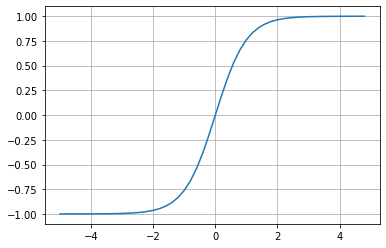

In [130]:
# here is the function f(x) = tanh(x)
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); 
plt.grid()
# plt.show() #tanh(0) = 0

We can create a biologically inspired neuron ;) with the following 

\begin{equation*}
f\left(\sum_{i} w_ix_i+b\right),
\end{equation*}

where $w_i$ is an edge weight, $x_i$ is an input, $b$ is the neuron bias, and $f$ is the activation function.


Next we create a neuron with two inputs:

In [131]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2 - synaptic strength of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron -- set to get clean numbers in the example below
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# n is the cell body without activation
n = x1w1x2w2 + b; n.label = 'n'

# o is cell body with activation tanh(x) = (e^(2x) - 1) / (e^(2x) + 1)
o = n.tanh(); o.label = 'o'

Remember the notation: 

\begin{equation*}
n.grad = \frac{\partial R}{\partial n} \enspace or \enspace node.grad = \frac{\partial root}{\partial node},
\end{equation*}

where $n.grad$ means we take the derivative of the root node $R$ with respect to node $n$.

Below, our root node is the output "o". So $o.grad$ is $\frac{\partial o}{\partial o} = 1$.


In [132]:
# root node == o
# n.grad means partial derivative of root w.r.t node n
# n.grad = do/dn

# do/do = 1
o.grad = o.data/o.data# 1.0

Next, we want to backpropagate through $\tanh(n)$, which requires us to know the local derivative of $\tanh(n)$. If $o = \tanh(n)$, then $\frac{\partial o}{\partial n} = \frac{\partial}{\partial n} \tanh(n) = 1 - \tanh^2(n) = 1 - o^2 = 1 - (o.data)^2$.

In [133]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2 = 1 - o**2
n.grad = 1 - o.data**2

Remember, that '$+$' node just routes the gradient, so it just flows to the two children nodes because the local derivative of the '$+$' operation is $1$ for every one of its nodes (local derivative means $\frac{\partial parent}{\partial child} = \frac{\partial parent_{of \hspace{0.1em} node \hspace{0.1em} i}}{\partial node_i}$ as opposed to a global derivative $\frac{\partial root}{\partial node_i}$). So by the chain rule, $1 \cdot \frac{\partial o}{\partial n} = \frac{\partial o}{\partial n} = n.grad$ because $o$ is the root node. 


In [134]:
# + node, so upper grad flows down
x1w1x2w2.grad = n.grad
b.grad = n.grad

# another + node, so grad continues to flow down
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

Next, the '$*$' nodes require us to take the partial derivative of the parent node with respect to the child node. 

\begin{equation*}
w_2.grad = \frac{\partial o}{\partial w_2}  
=  \frac{\partial o}{\partial x_2w_2} \cdot \frac{\partial x_2w_2}{\partial w_2} \\
= x_2w_2.grad \cdot \frac{\partial }{\partial w_2} [x_2w_2] 
= x_2w_2.grad \cdot x_2 
\end{equation*}

\begin{equation*}
x_2.grad = \frac{\partial o}{\partial x_2}  
=  \frac{\partial o}{\partial x_2w_2} \cdot \frac{\partial x_2w_2}{\partial x_2} \\
= x_2w_2.grad \cdot \frac{\partial }{\partial x_2} [x_2w_2] 
= x_2w_2.grad \cdot w_2 
\end{equation*}

\begin{equation*}
w_1.grad = \frac{\partial o}{\partial w_1}  
=  \frac{\partial o}{\partial x_1w_1} \cdot \frac{\partial x_1w_1}{\partial w_1} \\
= x_1w_1.grad \cdot \frac{\partial }{\partial w_1} [x_1w_1] 
= x_1w_1.grad \cdot x_1 
\end{equation*}

\begin{equation*}
x_1.grad = \frac{\partial o}{\partial x_1}  
=  \frac{\partial o}{\partial x_1w_1} \cdot \frac{\partial x_1w_1}{\partial x_1} \\
= x_1w_1.grad \cdot \frac{\partial }{\partial x_1} [x_1w_1] 
= x_1w_1.grad \cdot w_1 
\end{equation*}

In [135]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad  # grad of 0

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

Remember that the derivative at every point tell us how the output value at node $o$ will change. For example, $x_2.grad > 0$, so if we increase the value of $x_2$, the output value at $o$ should also increase. If $x_2.grad < 0$, then increasing $x_2$ would decrease the output.

We see that $w_2.grad = 0$ because $x_2 = 0$. The derivative tells us the influence of the node on the final output. If we vary $w_2$, the output doesn't change because we multiply by 0:


\begin{equation*}
\frac{\partial o}{\partial w_2} = w_2.grad = x_2w_2.grad \cdot x_2 = x_2w_2.grad \cdot 0 = 0
\end{equation*}

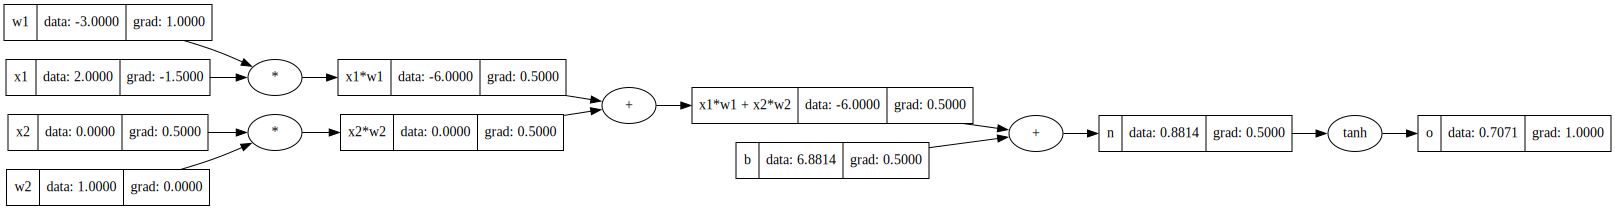

In [136]:
draw_dot(o)

In [137]:
# cool that you can do type annotation
def add(x: int, y: int) -> int:
    return x + y
add(2, 3)

5

---
## 6) Creating a Container Part 2

Next, we want to update the container to work with backpropagation.

---

In [138]:
class Value:
    
    # children initialization: convert tuple to set for efficiency... set = unordered, unchangeable, unique values
    def __init__(self, data, _children=(), _op='', label=''):
            self.data = data              # wrapped python value
            self.grad = 0.0               # global derivative of root node wrt self.data (initially 0 bc assuming no effect on output -- changing this variable doesn't change loss function)
            self._backward = lambda: None # a function to store how we chain the ouputs gradient into inputs gradient (default -- do nothing, e.g., a leaf node)
            self._prev = set(_children)   # pointers to Values used to create self (empty tuple by default)
            self._op = _op                # operation used to create self (empty string by default)
            self.label = label            # name of node
            
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        # compute the forward pass - get the parent node 
        out = Value(self.data + other.data, (self, other), '+') 

        # define the gradient propagation function as a closure 
        # -- how to take out's (parent) grad and propagate it into self's grad and other.grad (children of out)
        # chain rule: local derivative * global derivative (derivative final output of the expression -- root node -- wrt to out's data)
        def _backward():
            # in addition, the local derivative of self is 1
            # out = self + other
            # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self + other] = out.grad * 1
            # the same can be said for other.grad
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        # set rule for propagating grad to children
        out._backward = _backward  # store function object, not result _backward(), which is None because no return value
        return out
    
    def __mul__(self, other):
        # compute the forward pass - get the parent node 
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            # out = self * other
            # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self * other] = out.grad * other
            # the same can be said for other.grad
             self.grad = other.data * out.grad
             other.grad = self.data * out.grad
        
        # set rule for propagating grad to children
        out._backward = _backward
        return out
    
    def tanh(self):
        # graph link: self --> tanh(self.data) --> out
        # get the data from the input node
        x = self.data

        # mathematical expression for tanh
        t = (math.exp(2*x)-1) / (math.exp(2*x)+1)

        # compute the forward pass - get the parent node --> only one value because tanh(x) is linked by tanh --> out in graph
        out = Value(t, (self, ), 'tanh')

        def _backward():
            # out gradient is chained through the local gradient into self.grad
            self.grad = (1 - t**2) * out.grad # local derivative times global parent from chain rule

        # set rule for propagating grad to child 
        out._backward = _backward
        return out

### Let's see it in action

Initialize all nodes with the Values below

In [139]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2 - synaptic strength of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# n is the cell body without activation
n = x1w1x2w2 + b; n.label = 'n'

# o is cell body with activation tanh(x) = (e^(2x) - 1) / (e^(2x) + 1)
o = n.tanh(); o.label = 'o'

Propagate the gradient from the root node, $o$, backwards down the tree structure to the children nodes

In [140]:
# _backward() for tanh is (1-t**2) * o.grad, which is originally 0, so set initial case to o.grad = 1
o.grad = 1.0

# propagate o's grad through tanh to its parent node
o._backward()

# route the gradient of n to b and x1w1x2w2, since they are connected with '+' operation node
n._backward()

# b is a leaf node, so b's backward is the empty function lambda: None by default
b._backward()

# pass gradient of x1w1x2w2 to x1w1 and x2w2, since connected with '+'
x1w1x2w2._backward()

# these nodes are connected to their children through a times node '*', so
# propagate x2w2.grad and x1w1.grad backwards to a node times the other sibling node's data
# e.g, w2.grad = x2w2.grad * x2.data 
#      x1.grad = x1w1.grad * w1.data 
x2w2._backward()
x1w1._backward()

We currently have a mathematical expression that we want to automatically traverse backwards. We never want to call `_backward()` on a node before we have done so for all of its ancestor nodes (parents and above). This is because the gradients of parent nodes are passed backwards through the graph to their children nodes. In other words, we cannot propagate a node's gradient downard before all of its dependencies have passed theirs down (initialized to 0 anyway). We can get the order to call nodes in by using [topological sort](https://en.wikipedia.org/wiki/Topological_sorting), which lays out the nodes such that all the edges go one way from left to right.

In [141]:
# topological order: store order to call nodes in
topo = []

# set of unique visited nodes
visited = set()

# this function puts them in the opposite order
def build_topo(v):
    if v not in visited:
        # add node v to set of visited
        visited.add(v)
        
        # recursively call for each child of v (child + child = v)
        for child in v._prev:
            build_topo(child)
        
        # only add v to the list once its children have been processed
        topo.append(v)

# o is the output node
build_topo(o)

order = "backprop order: "
for i, node in enumerate(reversed(topo)):
    if i != len(topo)-1:
        order += f"{node.label} -> "
    else:
        order += node.label
order

'backprop order: o -> n -> b -> x1*w1 + x2*w2 -> x1*w1 -> x1 -> w1 -> x2*w2 -> x2 -> w2'

In [142]:
for node in reversed(topo):
    node._backward()

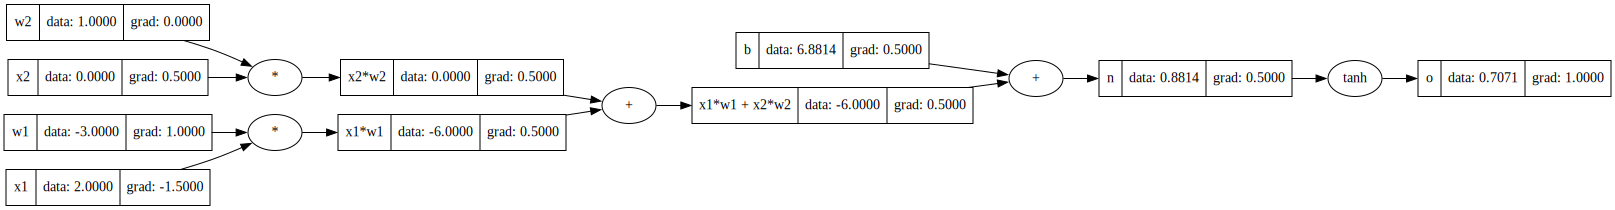

In [143]:
draw_dot(o)

---
## 7) Creating a Container Part 3

Now let's add the topological sort method in order to automatically backpropagate gradients down the graph

---

In [144]:
class Value:
    
    # children initialization: convert tuple to set for efficiency... set = unordered, unchangeable, unique values
    def __init__(self, data, _children=(), _op='', label=''):
            self.data = data              # wrapped python value
            self.grad = 0.0               # global derivative of root node wrt self.data (initially 0 bc assuming no effect on output -- changing this variable doesn't change loss function)
            self._backward = lambda: None # a function to store how we chain the ouputs gradient into inputs gradient (default -- do nothing, e.g., a leaf node)
            self._prev = set(_children)   # pointers to Values used to create self (empty tuple by default)
            self._op = _op                # operation used to create self (empty string by default)
            self.label = label            # name of node
            
    def __repr__(self):
        '''String representation of the Value'''
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        '''Add two Value objects and add resulting parent node to graph'''
        # compute the forward pass - get the parent node 
        out = Value(self.data + other.data, (self, other), '+') 

        # define the gradient propagation function as a closure 
        # -- how to take out's (parent) grad and propagate it into self's grad and other.grad (children of out)
        # chain rule: local derivative * global derivative (derivative final output of the expression -- root node -- wrt to out's data)
        def _backward():
            # in addition, the local derivative of self is 1
            # out = self + other
            # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self + other] = out.grad * 1
            # the same can be said for other.grad
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        # set rule for propagating grad to children
        out._backward = _backward  # store function object, not result _backward(), which is None because no return value
        return out
    
    def __mul__(self, other):
        '''Multiply two Value objects and add resulting parent node to graph'''
        # compute the forward pass - get the parent node 
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            # out = self * other
            # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self * other] = out.grad * other
            # the same can be said for other.grad
             self.grad = other.data * out.grad
             other.grad = self.data * out.grad
        
        # set rule for propagating grad to children
        out._backward = _backward
        return out
    
    def tanh(self):
        '''Apply tanh to a Value and add resulting parent Value to graph'''
        # graph link: self --> tanh(self.data) --> out
        # get the data from the input node
        x = self.data

        # mathematical expression for tanh
        t = (math.exp(2*x)-1) / (math.exp(2*x)+1)

        # compute the forward pass - get the parent node --> only one value because tanh(x) is linked by tanh --> out in graph
        out = Value(t, (self, ), 'tanh')

        def _backward():
            # out gradient is chained through the local gradient into self.grad
            self.grad = (1 - t**2) * out.grad # local derivative times global parent from chain rule

        # set rule for propagating grad to child 
        out._backward = _backward
        return out
    

    def backward(self):
        '''Backpropagate gradient from self down to children nodes'''
        # topological order: store order to call nodes in
        topo = []

        # set of unique visited nodes
        visited = set()

        # this function puts them in the opposite order
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                
                # recursively call for each child of v (child + child = v)
                for child in v._prev:
                    build_topo(child)
                
                # only add v to the list once its children have been processed
                topo.append(v)

        # build topological graph starting at self
        build_topo(self)   

        # initialized to 0, so set initial case to o.grad = 1 for chain rule products down the line
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [145]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2 - synaptic strength of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# n is the cell body without activation
n = x1w1x2w2 + b; n.label = 'n'

# o is cell body with activation tanh(x) = (e^(2x) - 1) / (e^(2x) + 1)
o = n.tanh(); o.label = 'o'

Let's draw the graph with the initialized gradients of $0$

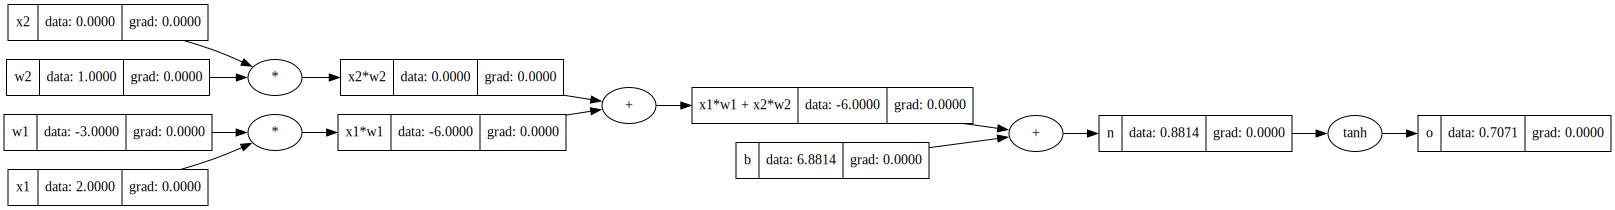

In [146]:
draw_dot(o)

And now draw it again after backpropagating the gradient from the root node (output) down to its children

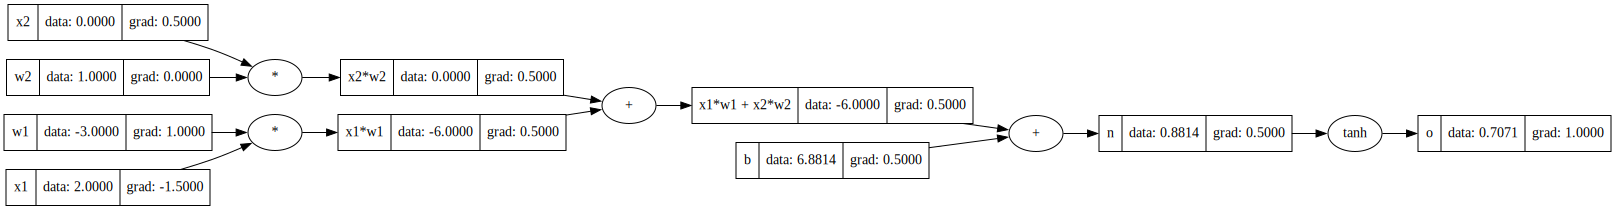

In [147]:
o.backward()
draw_dot(o)

---
## 8) Creating a Container Part 4

The Value class has some bugs when working with variables more than once.

---

Here, we have $b = 2a$. Then $b.grad = \frac{\partial b}{\partial b} = 1$, and $a.grad = \frac{\partial b}{\partial a} = \frac{\partial b}{\partial a} \cdot \frac{\partial a}{\partial a} = \frac{\partial }{\partial a}[2a] \cdot 1 = 2$. However, the `_backward()` method is giving us a value of $1$. If we look at how it is written:
```
1) def _backward():
2)   self.grad = 1.0 * out.grad
3)   other.grad = 1.0 * out.grad
```

we see that if `self` and `other` are the same `Value` object, then line 3 simply overwrites line 2. In this case, $a.grad = \text{self}.grad = \text{other}.grad$ is set to 1.0 in both lines ($out.grad = b.grad$).

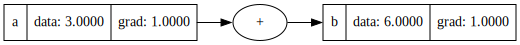

In [148]:
a = Value(3.0, label="a")
b = a + a; b.label = "b"
b.backward()
draw_dot(b)

The solution is to accumulate gradients in the `_backward()` methods with the '+=' operator. This works by the [multivariable case](https://en.wikipedia.org/wiki/Chain_rule#Multivariable_case) of the chain rule. Gradients start at $0$, and then any contribution that flows backwards will simply add.

In [149]:
class Value:
    
    # children initialization: convert tuple to set for efficiency... set = unordered, unchangeable, unique values
    def __init__(self, data, _children=(), _op='', label=''):
            self.data = data              # wrapped python value
            self.grad = 0.0               # global derivative of root node wrt self.data (initially 0 bc assuming no effect on output -- changing this variable doesn't change loss function)
            self._backward = lambda: None # a function to store how we chain the ouputs gradient into inputs gradient (default -- do nothing, e.g., a leaf node)
            self._prev = set(_children)   # pointers to Values used to create self (empty tuple by default)
            self._op = _op                # operation used to create self (empty string by default)
            self.label = label            # name of node
            
    def __repr__(self):
        '''String representation of the Value'''
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        '''Add two Value objects and add resulting parent node to graph'''
        # compute the forward pass - get the parent node 
        out = Value(self.data + other.data, (self, other), '+') 

        # define the gradient propagation function as a closure 
        # -- how to take out's (parent) grad and propagate it into self's grad and other.grad (children of out)
        # chain rule: local derivative * global derivative (derivative final output of the expression -- root node -- wrt to out's data)
        def _backward():
            # in addition, the local derivative of self is 1
            # out = self + other
            # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self + other] = out.grad * 1
            # the same can be said for other.grad
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        # set rule for propagating grad to children
        out._backward = _backward  # store function object, not result _backward(), which is None because no return value
        return out
    
    def __mul__(self, other):
        '''Multiply two Value objects and add resulting parent node to graph'''
        # compute the forward pass - get the parent node 
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            # out = self * other
            # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self * other] = out.grad * other
            # the same can be said for other.grad
             self.grad += other.data * out.grad
             other.grad += self.data * out.grad
        
        # set rule for propagating grad to children
        out._backward = _backward
        return out
    
    def tanh(self):
        '''Apply tanh to a Value and add resulting parent Value to graph'''
        # graph link: self --> tanh(self.data) --> out
        # get the data from the input node
        x = self.data

        # mathematical expression for tanh
        t = (math.exp(2*x)-1) / (math.exp(2*x)+1)

        # gcompute the forward pass - et the parent node --> only one value because tanh(x) is linked by tanh --> out in graph
        out = Value(t, (self, ), 'tanh')

        def _backward():
            # out gradient is chained through the local gradient into self.grad
            self.grad += (1 - t**2) * out.grad # local derivative times global parent from chain rule

        # set rule for propagating grad to child 
        out._backward = _backward
        return out
    

    def backward(self):
        '''Backpropagate gradient from self down to children nodes'''
        # topological order: store order to call nodes in
        topo = []

        # set of unique visited nodes
        visited = set()

        # this function puts them in the opposite order
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                
                # recursively call for each child of v (child + child = v)
                for child in v._prev:
                    build_topo(child)
                
                # only add v to the list once its children have been processed
                topo.append(v)

        # build topological graph starting at self
        build_topo(self)   

        # initialized to 0, so set initial case to o.grad = 1 for chain rule products down the line
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

$a.grad$ is now $2$ because we added $1$ once in line 2, and again in line 3: 
```
1) def _backward():
2)   self.grad += 1.0 * out.grad
3)   other.grad += 1.0 * out.grad
```

This solves the problem!

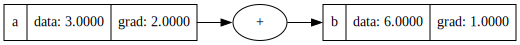

In [150]:
a = Value(3.0, label="a")
b = a + a; b.label = "b"
b.backward()
draw_dot(b)

---
## 9) Creating a Container Part 5

Next, we are going to decompose $\tanh$ and generalizes it by defining it in terms of `Values`. This way, we don't have to explicitly write down the formula for its derivative.

We will have to add a few more mathematical operations to the class as well: exponentiation, constant power, division, negation, subtraction.

---

First we add exponentiation: $e^x$. Given a root node $R$, and parent node with value $e^n$, the gradient for node $n$ is found as follows:
\begin{equation*}
n.grad = \frac{\partial R}{\partial n} = \frac{\partial R}{\partial \text{parent of } n} \cdot \frac{\partial \text{parent of } n}{\partial n} 
= \text{parent of } n.grad \cdot \frac{\partial }{\partial n} [e^n] = \text{parent of } n.grad \cdot e^n
\end{equation*}

where the parent of node $n$ passes its gradient down to node $n$ following the above rule.

To implement a power method given a root node $R$, and parent node with value $n^c$, the gradient for node $n$ is found as follows:
\begin{equation*}
n.grad = \frac{\partial R}{\partial n} = \frac{\partial R}{\partial \text{parent of } n} \cdot \frac{\partial \text{parent of } n}{\partial n} 
= \text{parent of } n.grad \cdot \frac{\partial }{\partial n} [n^c] = \text{parent of } n.grad \cdot c n^{(c-1)}
\end{equation*}

Division is just raising a `Value` to the power of $-1$. Negation is just multiplying a `Value` by $-1$. Subtraction is just adding the negation of one data type to a `Value`.

In [151]:
class Value:
    
    # children initialization: convert tuple to set for efficiency... set = unordered, unchangeable, unique values
    def __init__(self, data, _children=(), _op='', label=''):
            self.data = data              # wrapped python value
            self.grad = 0.0               # global derivative of root node wrt self.data (initially 0 bc assuming no effect on output -- changing this variable doesn't change loss function)
            self._backward = lambda: None # a function to store how we chain the ouputs gradient into inputs gradient (default -- do nothing, e.g., a leaf node)
            self._prev = set(_children)   # pointers to Values used to create self (empty tuple by default)
            self._op = _op                # operation used to create self (empty string by default)
            self.label = label            # name of node
            
    def __repr__(self):
        '''String representation of the Value'''
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        '''Add two Value objects and add resulting parent node to graph'''
        # if other is already a Value object, do nothing, if other is an int, for example, make it a Value
        other = other if isinstance(other, Value) else Value(other)

        # compute the forward pass - get the parent node 
        out = Value(self.data + other.data, (self, other), '+') 

        # define the gradient propagation function as a closure 
        # -- how to take out's (parent) grad and propagate it into self's grad and other.grad (children of out)
        # chain rule: local derivative * global derivative (derivative final output of the expression -- root node -- wrt to out's data)
        def _backward():
            # in addition, the local derivative of self is 1
            # out = self + other
            # self.grad = dRoot/self = dRoot/dout * dout/dself = out.grad * d/dself[self + other] = out.grad * 1
            # the same can be said for other.grad
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        # set rule for propagating grad to children
        out._backward = _backward  # store function object, not result _backward(), which is None because no return value
        return out
    
    def __radd__(self, other):
        '''Handle other + self by reformatting it as self + other'''
        return self + other  # Uses the __add__ method.
    
    def __mul__(self, other):
        '''Multiply two Value objects and add resulting parent node to graph'''
        # if other is already a Value object, do nothing, if other is an int, for example, make it a Value
        other = other if isinstance(other, Value) else Value(other)

        # compute the forward pass - get the parent node 
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            # out = self * other
            # self.grad = dRoot/self = dRoot/dout * dout/dself = out.grad * d/dself[self * other] = out.grad * other
            # the same can be said for other.grad
             self.grad += out.grad * other.data
             other.grad += out.grad * self.data 
        
        # set rule for propagating grad to children
        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        '''Handle other * self by reformatting it as self * other'''
        # check if can do other.__mul__(self), if not, then do self.__mul__(other)
        # this helps for case of int: a times Value: b   -->   a.__mul__(b) --> b.__mul__(a) 
        return self * other
    
    def __pow__(self, other):
        '''Raise self to a power specified by other and add resulting parent Value to graph'''
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"

        # compute the forward pass - get the parent node 
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            # out = self ** other
            # self.grad = dRoot/dself = dRoot/dout * dout/dself = out.grad * d/dself[self ** other] = out.grad * (other * self**(other-1))
            self.grad += out.grad * (other * self.data ** (other-1)) # chain the local derivative dout/dself to the rest of the product chain dRoot/dout

        # set rule for propagating grad to children
        out._backward = _backward
        return out
    
    def __truediv__(self, other):
        '''Divide self by other and add resulting parent node to graph'''
        # implemented using pow() method with value -1
        return self * other**-1
    
    def __rtruediv__(self, other):
        '''Handle other / self by reformatting it as other * self.__pow__(-1)'''
        return other * self.__pow__(-1)  # Uses the __pow__ and __mul__ methods.
    
    def __neg__(self):
        '''Negate a Value a add resulting parent node to graph'''
        return self * -1
    
    def __sub__(self, other):
        '''Subtract other from self using other.__neg__() and add resulting parent node to graph'''
        return self + (-other)
    
    def __rsub__(self, other):
        '''Handle other - self by reformatting it as self.__neg__() + other'''
        return other + (-self)  # Uses the __neg__ and __add__ methods.

    
    def tanh(self):
        '''Apply tanh to a Value and add resulting parent Value to graph'''
        # graph link: self --> tanh(self.data) --> out
        # get the data from the input node
        x = self.data

        # mathematical expression for tanh
        t = (math.exp(2*x)-1) / (math.exp(2*x)+1)

        # compute the forward pass - get the parent node --> only one value because tanh(x) is linked by tanh --> out in graph
        out = Value(t, (self, ), 'tanh')

        def _backward():
            # out gradient is chained through the local gradient into self.grad
            self.grad += (1 - t**2) * out.grad # local derivative times global parent from chain rule

        # set rule for propagating grad to child 
        out._backward = _backward
        return out
    
    def exp(self):
        '''Exponentiate a single Value (e^val) and add resulting parent node to graph'''
        # get the data from the input node
        x = self.data

        # compute the forward pass - get the parent node --> only one value because e^x is linked by e^x --> out in graph
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            # out = e^self
            # self.grad = dRoot/self = dRoot/dout * dout/dself = out.grad * d/dself[e^self] = out.grad * e^self
            self.grad += out.grad * out.data

        # set rule for propagating grad to child 
        out._backward = _backward

        return out

    def backward(self):
        '''Backpropagate gradient from self down to children nodes using topological sort'''
        # topological order: store order to call nodes in
        topo = []

        # set of unique visited nodes
        visited = set()

        # this function puts them in the opposite order
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                
                # recursively call for each child of v (child + child = v)
                for child in v._prev:
                    build_topo(child)
                
                # only add v to the list once its children have been processed
                topo.append(v)

        # build topological graph starting at self
        build_topo(self)   

        # initialized to 0, so set initial case to o.grad = 1 for chain rule products down the line
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

Next, we redefine the output node $o$ by breaking up $\tanh$ into `Values`.

In [152]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2 - synaptic strength of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# n is the cell body without activation
n = x1w1x2w2 + b; n.label = 'n'

# o is cell body with activation tanh(x) = (e^(2x) - 1) / (e^(2x) + 1)
e = (2*n).exp()
o = (e-1) / (e+1)
o.label = 'o'

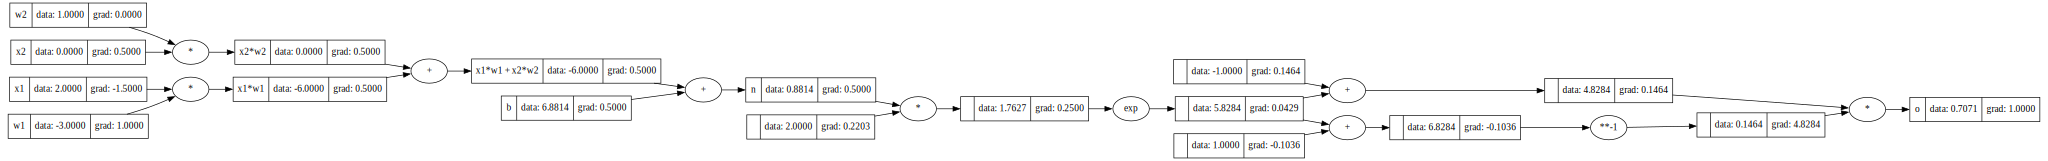

In [153]:
o.backward()
draw_dot(o)

---
## 10) Doing the same thing but in PyTorch

Now we're going to see how all of this works in PyTorch! In PyTorch, tensors are n-dimensional arrays of scalars. We just want scalar-valued tensors for our examples. Torch can do what we just did with micrograd as a special case when the tensors are all single-element tensors. PyTorch is nice because we can do a bunch of these operations in parallel using tensors.

---

In [154]:
import torch

In [155]:
# create a bunch of tensors with a single element and cast it to double (python uses double fp precision numbers by default)
# PyTorch assumes that these leaf nodes do not require a gradient by default for efficiency in the common case (do not want gradients for input to network -- leaf nodes)
# scalar-valued one-element tensors
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
print("data type:", x1.dtype)

# neuron operation
n = x1*w1 + x2*w2 + b

# activation function
o = torch.tanh(n)

# print the forward pass
# .item() strips the single element from the tensor
print(o.data.item())

# backpropagate gradients
o.backward()

# print the gradients
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

data type: torch.float64
0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [156]:
print(o)
print(o.item())
print(x2.grad)
print(x2.grad.item())

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)
0.7071066904050358
tensor([0.5000], dtype=torch.float64)
0.5000001283844369


---
## 9) Building a Neural Net Part 1

We are going to work our way up to building a multilayer perceptron, but first let's start by creating a single `Neuron`.

---

In [157]:
class Neuron:
    '''A single neuron'''
    def __init__(self, nin):
        # nin -- the number of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] # initialize a list of random weights for each input
        self.b = Value(random.uniform(-1, 1))                      # initialize a single bias term to control the overall trigger-happiness of the neuron
    
    def __call__(self, x):
        '''
        Call allows for something like this:
            n = Neuron(2)
            n(x)
        '''
        # I like this def: zip takes two iterators and creates a new iterator that iterates over the tuples of their corresponding entries
        # get the raw activation: w * x + b
        # the second arg is the starting sum value, so by starting with self.b, we don't have to add it on later
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        
        # return with a nonlinearity acting on act
        return act.tanh()
    


class Layer:
    '''A layer of nout neurons, each with nin inputs'''
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # if there is a single element wrapped in a list, just return the element
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    


class MLP:
    '''Multilayer perceptron'''
    def __init__(self, nin, nouts):
        # nin - number of inputs
        # nouts - list of nouts, the sizes of each successive layer

        # the sizes of each layer: the number of inputs, and then the output of each layer
        # nin is the input to the first layer -- put it in a list to be iterated over below
        # nouts[0] is output of the input (zeroeth) layer and the number of inputs for the first layer
        # and nouts[-1] is final output of the network
        sz = [nin] + nouts

        # iterate over consecutive pairs of sizes 
        # to create a layer for each (input, output) in the sizes list
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        # call each layer sequentially
        for layer in self.layers:
            x = layer(x)
        return x
    

# 3-dimensional input 
x = [2.0, 3.0, -1.0]

# 3 inputs into 2 layers of 4 and 1 output
n = MLP(3, [4, 4, 1]) 
n(x)

Value(data=0.7612522899880377)

Right now we haven't implemented backpropagation in the network, but the structure looks good

In [158]:
# draw_dot(n(x))

---
## 11) Building a Neural Net Part 2
Let's create a mini dataset for a binary classifier neural network. If the network prediction is lower than the target, then we want to push its output up. If it is higher, then we want to push it down.

---

In [159]:
# 3-dimensional inputs
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

# desired target output values
ys = [1.0, -1.0, -1.0, 1.0] 

# get the network's current predictions
ypreds = [n(x) for x in xs]
ypreds

[Value(data=0.7612522899880377),
 Value(data=0.05958737642633265),
 Value(data=0.6018501513394431),
 Value(data=0.6731022300840687)]

The loss is a single number that captures the performance of the neural net. We will implement the mean squared error loss.

In [160]:
# pair up ground truths with predictions
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypreds))
loss

Value(data=3.8525119366402003)

Next, backpropagate the gradients in loss with the calculated values. We can then access the first neuron in the first layer, and we see that its first weight has a nonzero gradient. 

- If it is positive, then its influence on the loss is positive. So slightly decreasing this particular weight of this neuron of this layer, would make the loss go down.

- If it is negative, then its influence on the loss is negative. So slightly increasing this particular weight of this neuron of this layer, would make the loss go down.

In [161]:
loss.backward()
n.layers[0].neurons[0].w[0].grad

0.18846147863767157

This huge graph contains 4 forward passes of a neural net (1 for each input in xs), and then calculates the loss. So the final output value if the calculated loss value. The values on the far left are our 4 sets of 3-dimensional input vectors.

This loss value backpropagates through all the forward passes through every single intermediate value of the neural net back to the parameters of the input weights.

The gradients on the input data are not very useful to us because we have fixed input values.

In [162]:
# draw_dot(loss)

---
## 12) Building a Neural Net Part 3
Now we want to write some code to collect all of the parameters of the neural net so that we can operate on them simultaneously. We will nudge all of them a tiny amount based on the gradient information.


---

In [163]:
class Neuron:
    '''A single neuron'''
    def __init__(self, nin):
        # nin -- the number of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] # initialize a list of random weights for each input
        self.b = Value(random.uniform(-1, 1))                      # initialize a single bias term to control the overall trigger-happiness of the neuron
    
    def __call__(self, x):
        '''
        Call allows for something like this:
            n = Neuron(2)
            n(x)
        '''
        # I like this def: zip takes two iterators and creates a new iterator that iterates over the tuples of their corresponding entries
        # get the raw activation: w * x + b
        # the second arg is the starting sum value, so by starting with self.b, we don't have to add it on later
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        
        # return with a nonlinearity acting on act
        return act.tanh()
    
    def parameters(self):
        # return a list of all parameters in the neuron
        return self.w +[self.b] # have to put b in a list
    


class Layer:
    '''A layer of nout neurons, each with nin inputs'''
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        # if there is a single element wrapped in a list, just return the element
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        # return a list of all parameters in all neurons in the layer
        return [p for neuron in self.neurons for p in neuron.parameters()]
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params
    


class MLP:
    '''Multilayer perceptron'''
    def __init__(self, nin, nouts):
        # nin - number of inputs
        # nouts - list of nouts, the sizes of each successive layer

        # the sizes of each layer: the number of inputs, and then the output of each layer
        # nouts[0] is output of the input (zeroeth) layer and the number of inputs for the first layer
        # and nouts[-1] is final output of the network
        sz = [nin] + nouts

        # iterate over consecutive pairs of sizes 
        # to create a layer for each (input, output) in the sizes list
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        # call each layer sequentially
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        # returns list of all parameters in all layers in the network
        return [p for layer in self.layers for p in layer.parameters()]

All the weights and biases in the entire neural net

In [164]:
# 3 inputs into 2 layers of 4 and 1 output
n = MLP(3, [4, 4, 1]) 
print("number of parameters:", len(n.parameters()))
# n.parameters()

number of parameters: 41


---
## 13) Gradient Descent Part 1

For gradient descent, we think of the gradient as a vector pointing in the direction of increased loss. So for every parameter in the network, we want to modify its value by a small step-size in the (opposite * -1) direction of this gradient in order to minimize the loss.

---

In [165]:
# 3 inputs into 2 layers of 4 and 1 output
n = MLP(3, [4, 4, 1]) 

# get the network's predictions
ypreds = [n(x) for x in xs]

# pair up ground truths with predictions
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypreds))
print("loss:", loss) 

loss: Value(data=4.265069100142703)


Propagate the loss value backwards and check out gradient of the first param in the first neuron of the first layer.

In [166]:
loss.backward()
print("param grad:",n.layers[0].neurons[0].w[0].grad)
print("param data:",n.layers[0].neurons[0].w[0].data)

param grad: 0.017924170456286536
param data: 0.780650432057826


We want to minimize the loss.

If the gradient of param is negative, then increasing the data value makes the loss go down. Decreasing the data value makes the loss go up.
If the gradient of param is positive, then increasing the data value makes the loss go up. Decreasing the data value makes the loss go down.



Looking at the code, below:
```
for p in n.parameters():
    p.data += 0.01 * p.grad
```
- If the grad < 0 and data < 0, then data decreases and the loss increases   (because grad < 0 and we decrease the val)
- If the grad < 0 and data > 0, then data decreases and the loss increases   (because grad < 0 and we decrease the val)
- If the grad > 0 and data < 0, then data increases and the loss increases   (because grad > 0 and we increase the val)
- If the grad > 0 and data > 0, then data increases and the loss increases   (because grad > 0 and we increase the val)

So we actually want to multiply this by $-1$ in order to make the loss decrease.

Looking at the code, below:
```
for p in n.parameters():
    p.data += -0.01 * p.grad
```
- If the grad < 0 and data < 0, then data increases and the loss decreases    (because grad < 0 and we increase the val)
- If the grad < 0 and data > 0, then data increases and the loss decreases    (because grad < 0 and we increase the val)
- If the grad > 0 and data < 0, then data decreases and the loss decreases    (because grad > 0 and we decrease the val)
- If the grad > 0 and data > 0, then data decreases and the loss decreases    (because grad > 0 and we decrease the val)


In [167]:
for p in n.parameters():
    p.data += -0.01 * p.grad

The param data should now be slightly different. 
- If grad was negative, then data should be larger
- If grad was positive, then data should be smaller

In [168]:
print("param grad:",n.layers[0].neurons[0].w[0].grad)
print("param data:",n.layers[0].neurons[0].w[0].data)

param grad: 0.017924170456286536
param data: 0.7804711903532632


We now expect to see a smaller loss

In [169]:
ypreds = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypreds))
print("loss:", loss)

loss: Value(data=3.9687634699604124)


---
## 14) Gradient Descent Part 2
Now let's implement a training loop to iteratively forward pass, backward pass, and then update parameter values.

---

In [170]:
# 3-dimensional inputs
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

# desired target output values
ys = [1.0, -1.0, -1.0, 1.0] 

In [171]:
# 3 inputs into 2 layers of 4 and 1 output
n = MLP(3, [4, 4, 1]) 

In [172]:
# number of training loops
numSteps = 100

# learning rate
lr = 0.05

for k in range(numSteps):
    # forward pass
    ypreds = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypreds)) # SSE: sum of squared errors (not normalized by size, so not MSE) -- multiplication by constant factor (1/len(xs)) doesn't affect critical point locations

    # want to zero out grads because each operations += the grads
    # we don't want to accumulate values over time
    # we want to start at 0 so that backward pass accumulates the loss derivatives
    for p in n.parameters():
        p.grad = 0
    
    # backward pass
    loss.backward()

    # update -- gradient descent
    for p in n.parameters():
        p.data += -lr * p.grad

    print(f"{k+1}/{numSteps}: loss={loss.data}")

1/100: loss=6.005085174190689
2/100: loss=4.735660751983675
3/100: loss=3.741589109622338
4/100: loss=3.139305506543504
5/100: loss=2.616119155840589
6/100: loss=2.065975252367311
7/100: loss=1.5459188804340664
8/100: loss=1.1131633111830341
9/100: loss=0.7912763302890471
10/100: loss=0.5709252888283386
11/100: loss=0.4246600941560035
12/100: loss=0.32663911470574186
13/100: loss=0.25909010380814956
14/100: loss=0.21100609422061115
15/100: loss=0.17569892442783042
16/100: loss=0.14904308065386385
17/100: loss=0.128424133147829
18/100: loss=0.11213519315818936
19/100: loss=0.09902921392606268
20/100: loss=0.08831450200080898
21/100: loss=0.07943124345881802
22/100: loss=0.0719748799135304
23/100: loss=0.0656472841308481
24/100: loss=0.06022486986310454
25/100: loss=0.055537281424997725
26/100: loss=0.0514528519652941
27/100: loss=0.04786848877625963
28/100: loss=0.04470251362692407
29/100: loss=0.041889512879028756
30/100: loss=0.03937657830006581
31/100: loss=0.0371205256180739
32/100:

Now let's see the outputs

In [173]:
ys

[1.0, -1.0, -1.0, 1.0]

In [174]:
ypreds

[Value(data=0.9858895558301025),
 Value(data=-0.9751052864988303),
 Value(data=-0.9464576357781952),
 Value(data=0.947118005205058)]

A neural network is a mathematical expression that takes some data vector and the parameter values (weights) as inputs. It passes these through the network during a forward pass. A loss function is then used to measure the accuracy of the prediction. The loss is low when the network is behaving well. We then use backpropagation to backward the loss throughout the network to all parameters in order to get their gradients. Then we use gradient descent to tune all of the parameters and decrease the loss locally.